## 02-EDA

#### Name: Emran Sabbagh

#### Student Number: 20088634

The first thing I did in this notebook was importing some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import stats
import yaml, time, sys, os, glob

import seaborn as sns
sns.set_style("darkgrid")

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)  

DATASET = "Texas_Inpatient_Discharge"
SPLIT_TRAINING = True
DEBUG = False
SEED = 42

COLAB = 'google.colab' in sys.modules
if COLAB:
    ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
else:
    ROOT = "./"

In [2]:
if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(d): os.makedirs(d)
  if not os.path.isdir(ROOT): os.makedirs(ROOT)

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['doc','orig','data','output']: makedirs(d)

## Dataset

I then read the df_train_sample_00_of_5.pkl dataset.

In [3]:
df = pd.read_pickle(f'{ROOT}/data/df_train_sample_00_of_5.pkl')

In [4]:
df.shape

(199939, 195)

I then created a variable called target and gave it the value TARGET which is the name of the target feature

I also created a list called cat_features which contains the names of the categorical features that I will be using from the df_train_sample_00_of_5 dataset.

I also created a list called cat_features which contains the names of the numerical features that I will be using from the df_train_sample_00_of_5 dataset

I also created a variable calledd features and gave it the value of cat_features plus num_features

I chose the features based on the EDA I did on them which I will show in the later sections

In [5]:
target = 'TARGET'
#ignore_features = []
cat_features = [
    'TYPE_OF_ADMISSION',
    'SOURCE_OF_ADMISSION',
    'PAT_STATE',
    'PUBLIC_HEALTH_REGION',
    'RACE',
    'ETHNICITY',
    'ADMIT_WEEKDAY',
    'RISK_MORTALITY',
    'ILLNESS_SEVERITY',
    'POA_PROVIDER_INDICATOR'
]
num_features = []
features = cat_features + num_features



The features I chose contained a lot of na values so I had to clean them

In [6]:
df[features].isna().sum()

TYPE_OF_ADMISSION            0
SOURCE_OF_ADMISSION         38
PAT_STATE                   49
PUBLIC_HEALTH_REGION      6659
RACE                       730
ETHNICITY                 1450
ADMIT_WEEKDAY                0
RISK_MORTALITY               0
ILLNESS_SEVERITY             0
POA_PROVIDER_INDICATOR       0
dtype: int64

### TARGET

We can see from below that the short value is the most occuring value in the TARGET feature and the long value is the least occuring. I then visualised this information using barplot

In [7]:
df.TARGET.value_counts(normalize=True)

short     0.416087
medium    0.382062
long      0.201852
Name: TARGET, dtype: float64

<AxesSubplot:>

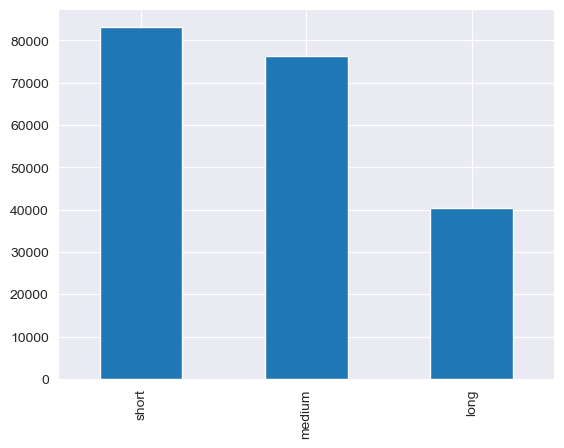

In [8]:
df.TARGET.value_counts().plot(kind='bar')

In [9]:
df.head()

,RECORD_ID,DISCHARGE,THCIC_ID,PROVIDER_NAME,TYPE_OF_ADMISSION,SOURCE_OF_ADMISSION,SPEC_UNIT_1,SPEC_UNIT_2,SPEC_UNIT_3,SPEC_UNIT_4,SPEC_UNIT_5,PAT_STATE,PAT_ZIP,PAT_COUNTRY,COUNTY,PUBLIC_HEALTH_REGION,PAT_STATUS,SEX_CODE,RACE,ETHNICITY,ADMIT_WEEKDAY,LENGTH_OF_STAY,PAT_AGE,FIRST_PAYMENT_SRC,SECONDARY_PAYMENT_SRC,TYPE_OF_BILL,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,POA_PROVIDER_INDICATOR,ADMITTING_DIAGNOSIS,PRINC_DIAG_CODE,POA_PRINC_DIAG_CODE,OTH_DIAG_CODE_1,POA_OTH_DIAG_CODE_1,OTH_DIAG_CODE_2,POA_OTH_DIAG_CODE_2,OTH_DIAG_CODE_3,POA_OTH_DIAG_CODE_3,OTH_DIAG_CODE_4,POA_OTH_DIAG_CODE_4,OTH_DIAG_CODE_5,POA_OTH_DIAG_CODE_5,OTH_DIAG_CODE_6,POA_OTH_DIAG_CODE_6,OTH_DIAG_CODE_7,POA_OTH_DIAG_CODE_7,OTH_DIAG_CODE_8,POA_OTH_DIAG_CODE_8,OTH_DIAG_CODE_9,POA_OTH_DIAG_CODE_9,OTH_DIAG_CODE_10,POA_OTH_DIAG_CODE_10,OTH_DIAG_CODE_11,POA_OTH_DIAG_CODE_11,OTH_DIAG_CODE_12,POA_OTH_DIAG_CODE_12,OTH_DIAG_CODE_13,POA_OTH_DIAG_CODE_13,OTH_DIAG_CODE_14,POA_OTH_DIAG_CODE_14,OTH_DIAG_CODE_15,POA_OTH_DIAG_CODE_15,OTH_DIAG_CODE_16,POA_OTH_DIAG_CODE_16,OTH_DIAG_CODE_17,POA_OTH_DIAG_CODE_17,OTH_DIAG_CODE_18,POA_OTH_DIAG_CODE_18,OTH_DIAG_CODE_19,POA_OTH_DIAG_CODE_19,OTH_DIAG_CODE_20,POA_OTH_DIAG_CODE_20,OTH_DIAG_CODE_21,POA_OTH_DIAG_CODE_21,OTH_DIAG_CODE_22,POA_OTH_DIAG_CODE_22,OTH_DIAG_CODE_23,POA_OTH_DIAG_CODE_23,OTH_DIAG_CODE_24,POA_OTH_DIAG_CODE_24,E_CODE_1,POA_E_CODE_1,E_CODE_2,POA_E_CODE_2,E_CODE_3,POA_E_CODE_3,E_CODE_4,POA_E_CODE_4,E_CODE_5,POA_E_CODE_5,E_CODE_6,POA_E_CODE_6,E_CODE_7,POA_E_CODE_7,E_CODE_8,POA_E_CODE_8,E_CODE_9,POA_E_CODE_9,E_CODE_10,POA_E_CODE_10,PRINC_SURG_PROC_CODE,PRINC_SURG_PROC_DAY,PRINC_ICD9_CODE,OTH_SURG_PROC_CODE_1,OTH_SURG_PROC_DAY_1,OTH_ICD9_CODE_1,OTH_SURG_PROC_CODE_2,OTH_SURG_PROC_DAY_2,OTH_ICD9_CODE_2,OTH_SURG_PROC_CODE_3,OTH_SURG_PROC_DAY_3,OTH_ICD9_CODE_3,OTH_SURG_PROC_CODE_4,OTH_SURG_PROC_DAY_4,OTH_ICD9_CODE_4,OTH_SURG_PROC_CODE_5,OTH_SURG_PROC_DAY_5,OTH_ICD9_CODE_5,OTH_SURG_PROC_CODE_6,OTH_SURG_PROC_DAY_6,OTH_ICD9_CODE_6,OTH_SURG_PROC_CODE_7,OTH_SURG_PROC_DAY_7,OTH_ICD9_CODE_7,OTH_SURG_PROC_CODE_8,OTH_SURG_PROC_DAY_8,OTH_ICD9_CODE_8,OTH_SURG_PROC_CODE_9,OTH_SURG_PROC_DAY_9,OTH_ICD9_CODE_9,OTH_SURG_PROC_CODE_10,OTH_SURG_PROC_DAY_10,OTH_ICD9_CODE_10,OTH_SURG_PROC_CODE_11,OTH_SURG_PROC_DAY_11,OTH_ICD9_CODE_11,OTH_SURG_PROC_CODE_12,OTH_SURG_PROC_DAY_12,OTH_ICD9_CODE_12,OTH_SURG_PROC_CODE_13,OTH_SURG_PROC_DAY_13,OTH_ICD9_CODE_13,OTH_SURG_PROC_CODE_14,OTH_SURG_PROC_DAY_14,OTH_ICD9_CODE_14,OTH_SURG_PROC_CODE_15,OTH_SURG_PROC_DAY_15,OTH_ICD9_CODE_15,OTH_SURG_PROC_CODE_16,OTH_SURG_PROC_DAY_16,OTH_ICD9_CODE_16,OTH_SURG_PROC_CODE_17,OTH_SURG_PROC_DAY_17,OTH_ICD9_CODE_17,OTH_SURG_PROC_CODE_18,OTH_SURG_PROC_DAY_18,OTH_ICD9_CODE_18,OTH_SURG_PROC_CODE_19,OTH_SURG_PROC_DAY_19,OTH_ICD9_CODE_19,OTH_SURG_PROC_CODE_20,OTH_SURG_PROC_DAY_20,OTH_ICD9_CODE_20,OTH_SURG_PROC_CODE_21,OTH_SURG_PROC_DAY_21,OTH_ICD9_CODE_21,OTH_SURG_PROC_CODE_22,OTH_SURG_PROC_DAY_22,OTH_ICD9_CODE_22,OTH_SURG_PROC_CODE_23,OTH_SURG_PROC_DAY_23,OTH_ICD9_CODE_23,OTH_SURG_PROC_CODE_24,OTH_SURG_PROC_DAY_24,OTH_ICD9_CODE_24,MS_MDC,MS_DRG,MS_GROUPER_VERSION_NBR,MS_GROUPER_ERROR_CODE,APR_MDC,APR_DRG,RISK_MORTALITY,ILLNESS_SEVERITY,APR_GROUPER_VERSION_NBR,APR_GROUPER_ERROR_CODE,ATTENDING_PHYSICIAN_UNIF_ID,OPERATING_PHYSICIAN_UNIF_ID,ENCOUNTER_INDICATOR,CERT_STATUS,FILLER_SPACE,TARGET
884115,320136748870,2013Q3,838400,Memorial Hermann Rehab Hospital Katy,3,4,R,NaN,NaN,NaN,NaN,TX,77095,US,201,06,07,F,4,2,2,1,20,MA,MB,111,1671.00,0.00,1145.00,0.00,526.00,0.00,X,V5789,V5789,NaN,1919,Y,5119,Y,V8543,NaN,78459,Y,27801,Y,7812,Y,5180,Y,34590,Y,4019,Y,7993,Y,2724,Y,72887,Y,36250,Y,78093,Y,36901,Y,V5878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### TYPE_OF_ADMISSION

I then started looking at the features in the pdf document and checking the amount of unique values they have

The first feature I chose was TYPE_OF_ADMISSION because it contains a small number of unique values which makes values change less time consuming and easier.

In [10]:
df.TYPE_OF_ADMISSION.value_counts()

1    86421
3    52074
2    34187
4    25459
5      926
9      867
`        5
Name: TYPE_OF_ADMISSION, dtype: int64

I then started changing the values through mapping, I changed every value to its corresponding value based on the pdf document, for example 1 is Emergency, 2 is Urgent, etc. I also changed all the nan values (Empty rows) to NA. I then checked the number of na values in this feature after doing this cleaning and found out that there are no more na values left

In [11]:

mapping = {
"1": "Emergency",
"2": "Urgent",
"3": "Elective",
"4": "Newborn",
"5": "Trauma Center",
"9": "NA",
"`": "NA",
np.nan: 'NA'
}
tmp = df.TYPE_OF_ADMISSION.map(mapping)
assert tmp.isna().sum()==0
df.TYPE_OF_ADMISSION = pd.Categorical(tmp)
df.TYPE_OF_ADMISSION.isna().sum()

#df.TYPE_OF_ADMISSION.map(mapping).isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Emergency value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

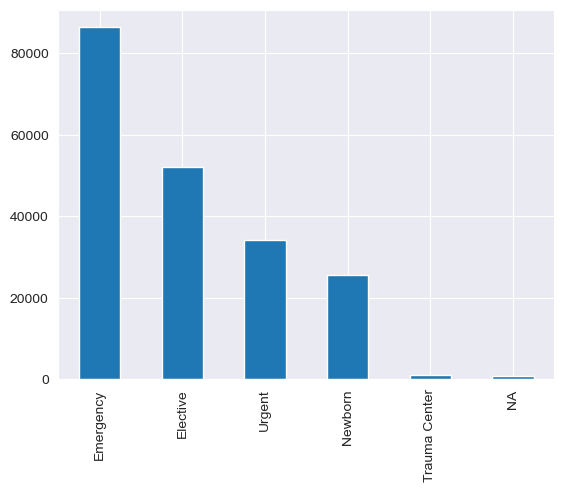

In [12]:
df.TYPE_OF_ADMISSION.value_counts().plot(kind='bar')
#plt.show()

### SOURCE_OF_ADMISSION

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the SOURCE_OF_ADMISSION feature

In [13]:
df.SOURCE_OF_ADMISSION.value_counts()

1    120403
2     34663
5     26426
4     13078
6      1742
8      1568
D       969
9       902
`       146
3         2
0         2
Name: SOURCE_OF_ADMISSION, dtype: int64

In [14]:
mapping = {
"1": "Non-Healthcare POO",
"2": "Clinic referral",
"4": "Hospital transfer",
"5": "Transfer from nursing facility",
"6": "Transfer from another health care facility",
"8": "Court/Law Enforcement",
"9": "NA",
'`': 'NA',
'D': 'Internal Transfer',
    
'0':'Transfer for hospital',
'3':'NA',
'7':'NA',
np.nan: 'NA'
}

tmp = df.SOURCE_OF_ADMISSION.map(mapping)
assert tmp.isna().sum()==0
df.SOURCE_OF_ADMISSION = pd.Categorical(tmp)
df.SOURCE_OF_ADMISSION.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Non-Healthcare POO value has the biggest count. We can also see that there are a lot of values that have very low count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

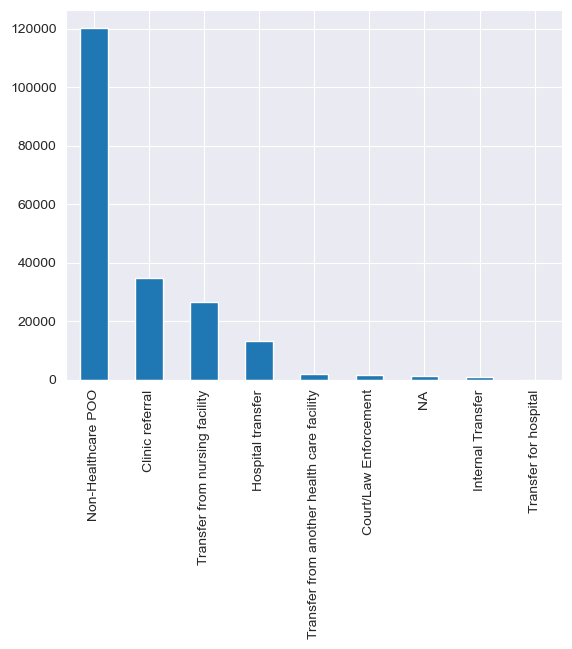

In [15]:
df.SOURCE_OF_ADMISSION.value_counts().plot(kind='bar')

### PAT_STATE

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the PAT_STATE feature

In [16]:
df.PAT_STATE.value_counts()

TX    194436
ZZ      1671
NM      1151
AR       916
OK       679
FC       549
LA       427
XX        44
`         17
Name: PAT_STATE, dtype: int64

In [17]:

mapping = {
"AR": "Arkansas",
"LA": "Louisiana",
"NM": "New Mexico",
"OK": "Oklahoma",
"TX": "Texas",
"ZZ": "All other states and American Territories",
"FC": "Foreign country",
"XX": 'Foreign country',
"`": "NA",
np.nan: 'NA'
}
tmp = df.PAT_STATE.map(mapping)
assert tmp.isna().sum()==0
df.PAT_STATE = pd.Categorical(tmp)
df.PAT_STATE.isna().sum()

#df.TYPE_OF_ADMISSION.map(mapping).isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Texas value has the biggest count. All of the other values have very low count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

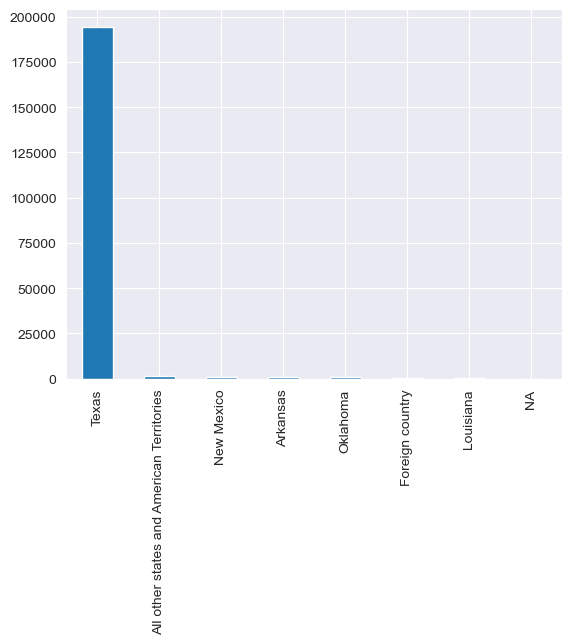

In [18]:
df.PAT_STATE.value_counts().plot(kind='bar')

### PUBLIC_HEALTH_REGION

For PUBLIC_HEALTH_REGION I just filled na values with the value NA because the corresponding names of the unique features from the pdf document are very long. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

In [19]:
df.PUBLIC_HEALTH_REGION.value_counts(dropna=False)

03     50248
06     46158
07     21176
08     20141
11     17667
04      9318
05      6669
NaN     6659
01      6526
10      6484
09      4480
02      4413
Name: PUBLIC_HEALTH_REGION, dtype: int64

In [20]:
df.PUBLIC_HEALTH_REGION.fillna('NA', inplace=True)

### RACE

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the RACE feature

In [21]:
df.RACE.value_counts()

4    124899
5     43407
3     26408
2      3927
1       534
`        34
Name: RACE, dtype: int64

In [22]:
mapping = {
'1': 'America_Indian',
'2': 'Asian',
'3': 'Black',
"4": "White",
"5": "Other",
"`": "NA",
np.nan: 'NA'
}
tmp = df.RACE.map(mapping)
assert tmp.isna().sum()==0
df.RACE = pd.Categorical(tmp)
df.RACE.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that White value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

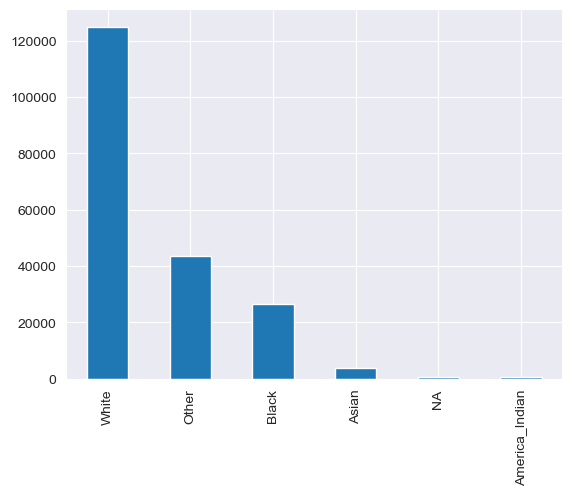

In [23]:
df.RACE.value_counts().plot(kind='bar')

### ETHNICITY

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the ETHNICITY feature

In [24]:
df.ETHNICITY.value_counts()

2    140096
1     57615
`       778
Name: ETHNICITY, dtype: int64

In [25]:
mapping = {
'1': 'Hispanic',
'2': 'Not_Hispanic',
"`": "NA",
np.nan: 'NA'
}
tmp = df.ETHNICITY.map(mapping)
assert tmp.isna().sum()==0
df.ETHNICITY = pd.Categorical(tmp)
df.ETHNICITY.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Not_Hispanic value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

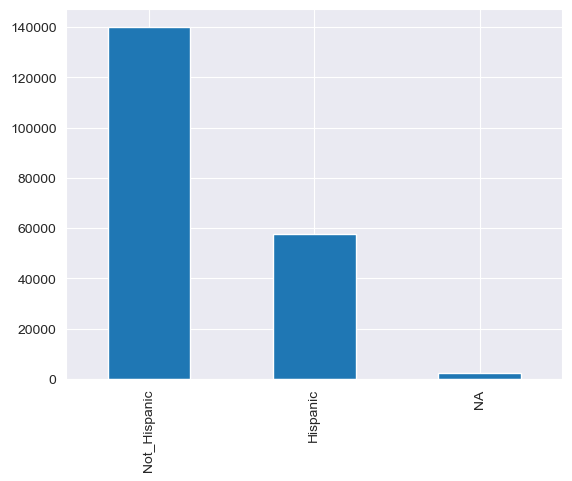

In [26]:
df.ETHNICITY.value_counts().plot(kind='bar')

### ADMIT_WEEKDAY

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the ADMIT_WEEKDAY feature

In [27]:
df.ADMIT_WEEKDAY.value_counts()

1    34739
2    34035
3    32425
4    31074
5    29588
6    19541
7    18537
Name: ADMIT_WEEKDAY, dtype: int64

In [28]:
mapping = {
'1': 'Monday',
'2': 'Tuesday',
'3': 'Wednesday',
"4": "Thursday",
"5": "Friday",
"6": "Saturday",
"7": "Sunday",
"`": "NA",
np.nan: 'NA'
}
tmp = df.ADMIT_WEEKDAY.map(mapping)
assert tmp.isna().sum()==0
df.ADMIT_WEEKDAY = pd.Categorical(tmp)
df.ADMIT_WEEKDAY.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Monday value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

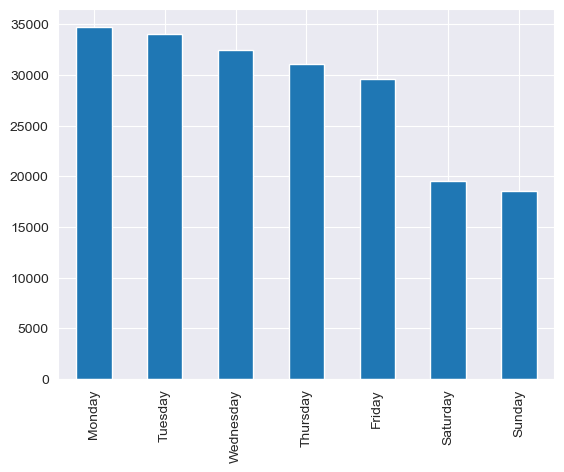

In [29]:
df.ADMIT_WEEKDAY.value_counts().plot(kind='bar')

### RISK_MORTALITY

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the RISK_MORTALITY feature

In [30]:
df.RISK_MORTALITY.value_counts()

1    123084
2     40377
3     26561
4      9502
0       415
Name: RISK_MORTALITY, dtype: int64

In [31]:
mapping = {
'1': 'Minor_Mortality_Risk',
'2': 'Moderate_Mortality_Risk',
'3': 'Major_Mortality_Risk',
"4": "Extreme_Mortality_Risk",
"0": "NA",
np.nan: 'NA'
}
tmp = df.RISK_MORTALITY.map(mapping)
assert tmp.isna().sum()==0
df.RISK_MORTALITY = pd.Categorical(tmp)
df.RISK_MORTALITY.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Minor_Mortality_Risk value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

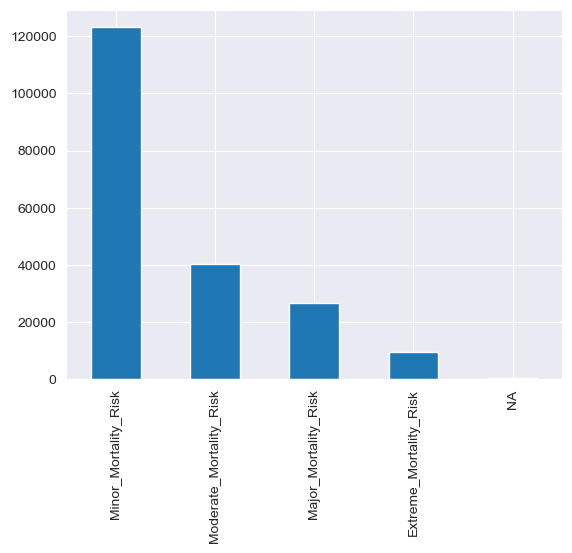

In [32]:
df.RISK_MORTALITY.value_counts().plot(kind='bar')

### ILLNESS_SEVERITY

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the ILLNESS_SEVERITY feature

In [33]:
df.ILLNESS_SEVERITY.value_counts()

1    75194
2    69708
3    42110
4    12512
0      415
Name: ILLNESS_SEVERITY, dtype: int64

In [34]:
mapping = {
'1': 'Minor_Illness_Severity',
'2': 'Moderate_Illness_Severity',
'3': 'Major_Illness_Severity',
"4": "Extreme_Illness_Severity",
"0": "NA",
np.nan: 'NA'
}
tmp = df.ILLNESS_SEVERITY.map(mapping)
assert tmp.isna().sum()==0
df.ILLNESS_SEVERITY = pd.Categorical(tmp)
df.ILLNESS_SEVERITY.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Minor_Illness_Severity value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

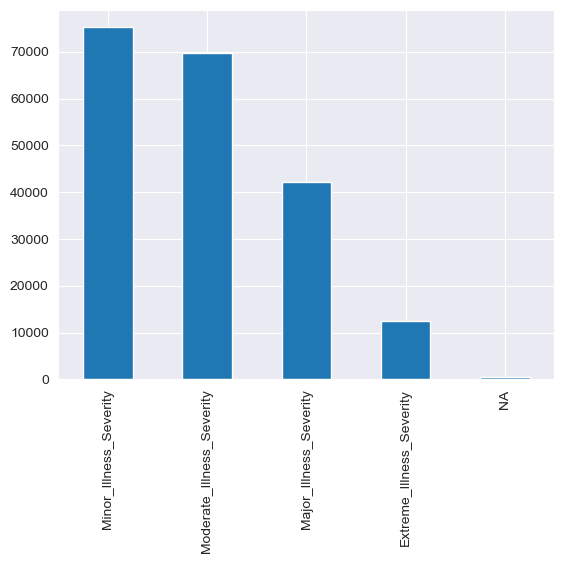

In [35]:
df.ILLNESS_SEVERITY.value_counts().plot(kind='bar')

### POA_PROVIDER_INDICATOR

I then did the same process from before which included changing values to their corresponding values and changing nan values into NA values on the POA_PROVIDER_INDICATOR feature

In [36]:
df.POA_PROVIDER_INDICATOR.value_counts()

M    102958
R     74709
X     22272
Name: POA_PROVIDER_INDICATOR, dtype: int64

In [37]:
mapping = {
'M': 'Mixed',
'R': 'Required',
'X': 'Exempt',
"`": "NA",
np.nan: 'NA'
}
tmp = df.POA_PROVIDER_INDICATOR.map(mapping)
assert tmp.isna().sum()==0
df.POA_PROVIDER_INDICATOR = pd.Categorical(tmp)
df.POA_PROVIDER_INDICATOR.isna().sum()

0

I then visualised the unique values of the feature using barplot. We can see that Mixed value has the biggest count. We can also see that the number of unqiue values is small so this is a good reason to include this feature. 

<AxesSubplot:>

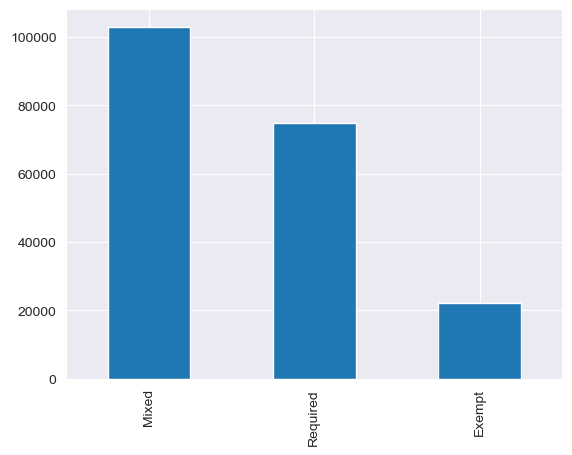

In [38]:
df.POA_PROVIDER_INDICATOR.value_counts().plot(kind='bar')

I then checked for the sum of na values in all the features I selected and it was 0 for all of them

In [39]:
df[features].isna().sum()

TYPE_OF_ADMISSION         0
SOURCE_OF_ADMISSION       0
PAT_STATE                 0
PUBLIC_HEALTH_REGION      0
RACE                      0
ETHNICITY                 0
ADMIT_WEEKDAY             0
RISK_MORTALITY            0
ILLNESS_SEVERITY          0
POA_PROVIDER_INDICATOR    0
dtype: int64

I then read the grading.csv.gz dataset which is the test dataset so I can clean it, I also called the dataframe df2

In [40]:
df2 = pd.read_csv(f"{ROOT}/orig/grading.csv.gz", dtype=str)
df2.shape

(100000, 193)

In [41]:
df2.head()

,RECORD_ID,DISCHARGE,THCIC_ID,PROVIDER_NAME,TYPE_OF_ADMISSION,SOURCE_OF_ADMISSION,SPEC_UNIT_1,SPEC_UNIT_2,SPEC_UNIT_3,SPEC_UNIT_4,SPEC_UNIT_5,PAT_STATE,PAT_ZIP,PAT_COUNTRY,COUNTY,PUBLIC_HEALTH_REGION,PAT_STATUS,SEX_CODE,RACE,ETHNICITY,ADMIT_WEEKDAY,PAT_AGE,FIRST_PAYMENT_SRC,SECONDARY_PAYMENT_SRC,TYPE_OF_BILL,TOTAL_CHARGES,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ACCOMM,TOTAL_NON_COV_CHARGES_ACCOMM,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,POA_PROVIDER_INDICATOR,ADMITTING_DIAGNOSIS,PRINC_DIAG_CODE,POA_PRINC_DIAG_CODE,OTH_DIAG_CODE_1,POA_OTH_DIAG_CODE_1,OTH_DIAG_CODE_2,POA_OTH_DIAG_CODE_2,OTH_DIAG_CODE_3,POA_OTH_DIAG_CODE_3,OTH_DIAG_CODE_4,POA_OTH_DIAG_CODE_4,OTH_DIAG_CODE_5,POA_OTH_DIAG_CODE_5,OTH_DIAG_CODE_6,POA_OTH_DIAG_CODE_6,OTH_DIAG_CODE_7,POA_OTH_DIAG_CODE_7,OTH_DIAG_CODE_8,POA_OTH_DIAG_CODE_8,OTH_DIAG_CODE_9,POA_OTH_DIAG_CODE_9,OTH_DIAG_CODE_10,POA_OTH_DIAG_CODE_10,OTH_DIAG_CODE_11,POA_OTH_DIAG_CODE_11,OTH_DIAG_CODE_12,POA_OTH_DIAG_CODE_12,OTH_DIAG_CODE_13,POA_OTH_DIAG_CODE_13,OTH_DIAG_CODE_14,POA_OTH_DIAG_CODE_14,OTH_DIAG_CODE_15,POA_OTH_DIAG_CODE_15,OTH_DIAG_CODE_16,POA_OTH_DIAG_CODE_16,OTH_DIAG_CODE_17,POA_OTH_DIAG_CODE_17,OTH_DIAG_CODE_18,POA_OTH_DIAG_CODE_18,OTH_DIAG_CODE_19,POA_OTH_DIAG_CODE_19,OTH_DIAG_CODE_20,POA_OTH_DIAG_CODE_20,OTH_DIAG_CODE_21,POA_OTH_DIAG_CODE_21,OTH_DIAG_CODE_22,POA_OTH_DIAG_CODE_22,OTH_DIAG_CODE_23,POA_OTH_DIAG_CODE_23,OTH_DIAG_CODE_24,POA_OTH_DIAG_CODE_24,E_CODE_1,POA_E_CODE_1,E_CODE_2,POA_E_CODE_2,E_CODE_3,POA_E_CODE_3,E_CODE_4,POA_E_CODE_4,E_CODE_5,POA_E_CODE_5,E_CODE_6,POA_E_CODE_6,E_CODE_7,POA_E_CODE_7,E_CODE_8,POA_E_CODE_8,E_CODE_9,POA_E_CODE_9,E_CODE_10,POA_E_CODE_10,PRINC_SURG_PROC_CODE,PRINC_SURG_PROC_DAY,PRINC_ICD9_CODE,OTH_SURG_PROC_CODE_1,OTH_SURG_PROC_DAY_1,OTH_ICD9_CODE_1,OTH_SURG_PROC_CODE_2,OTH_SURG_PROC_DAY_2,OTH_ICD9_CODE_2,OTH_SURG_PROC_CODE_3,OTH_SURG_PROC_DAY_3,OTH_ICD9_CODE_3,OTH_SURG_PROC_CODE_4,OTH_SURG_PROC_DAY_4,OTH_ICD9_CODE_4,OTH_SURG_PROC_CODE_5,OTH_SURG_PROC_DAY_5,OTH_ICD9_CODE_5,OTH_SURG_PROC_CODE_6,OTH_SURG_PROC_DAY_6,OTH_ICD9_CODE_6,OTH_SURG_PROC_CODE_7,OTH_SURG_PROC_DAY_7,OTH_ICD9_CODE_7,OTH_SURG_PROC_CODE_8,OTH_SURG_PROC_DAY_8,OTH_ICD9_CODE_8,OTH_SURG_PROC_CODE_9,OTH_SURG_PROC_DAY_9,OTH_ICD9_CODE_9,OTH_SURG_PROC_CODE_10,OTH_SURG_PROC_DAY_10,OTH_ICD9_CODE_10,OTH_SURG_PROC_CODE_11,OTH_SURG_PROC_DAY_11,OTH_ICD9_CODE_11,OTH_SURG_PROC_CODE_12,OTH_SURG_PROC_DAY_12,OTH_ICD9_CODE_12,OTH_SURG_PROC_CODE_13,OTH_SURG_PROC_DAY_13,OTH_ICD9_CODE_13,OTH_SURG_PROC_CODE_14,OTH_SURG_PROC_DAY_14,OTH_ICD9_CODE_14,OTH_SURG_PROC_CODE_15,OTH_SURG_PROC_DAY_15,OTH_ICD9_CODE_15,OTH_SURG_PROC_CODE_16,OTH_SURG_PROC_DAY_16,OTH_ICD9_CODE_16,OTH_SURG_PROC_CODE_17,OTH_SURG_PROC_DAY_17,OTH_ICD9_CODE_17,OTH_SURG_PROC_CODE_18,OTH_SURG_PROC_DAY_18,OTH_ICD9_CODE_18,OTH_SURG_PROC_CODE_19,OTH_SURG_PROC_DAY_19,OTH_ICD9_CODE_19,OTH_SURG_PROC_CODE_20,OTH_SURG_PROC_DAY_20,OTH_ICD9_CODE_20,OTH_SURG_PROC_CODE_21,OTH_SURG_PROC_DAY_21,OTH_ICD9_CODE_21,OTH_SURG_PROC_CODE_22,OTH_SURG_PROC_DAY_22,OTH_ICD9_CODE_22,OTH_SURG_PROC_CODE_23,OTH_SURG_PROC_DAY_23,OTH_ICD9_CODE_23,OTH_SURG_PROC_CODE_24,OTH_SURG_PROC_DAY_24,OTH_ICD9_CODE_24,MS_MDC,MS_DRG,MS_GROUPER_VERSION_NBR,MS_GROUPER_ERROR_CODE,APR_MDC,APR_DRG,RISK_MORTALITY,ILLNESS_SEVERITY,APR_GROUPER_VERSION_NBR,APR_GROUPER_ERROR_CODE,ATTENDING_PHYSICIAN_UNIF_ID,OPERATING_PHYSICIAN_UNIF_ID,ENCOUNTER_INDICATOR,CERT_STATUS,FILLER_SPACE
0,420132203333,2013Q4,145000,University Medical Center,2,1,NaN,NaN,NaN,NaN,NaN,TX,79415,US,303,01,01,F,4,1,4,08,MC,ZZ,111,16352.05,0.00,5555.00,0.00,10797.05,0.00,M,V220,65981,Y,65911,N,64891,Y,66101,N,7923,N,V270,NaN,V0251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,+001,734,741,+001,741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

I first checked if the dataset contains na values and found out that it does

In [42]:
df2[features].isna().sum()

TYPE_OF_ADMISSION            0
SOURCE_OF_ADMISSION         19
PAT_STATE                   23
PUBLIC_HEALTH_REGION      3301
RACE                       361
ETHNICITY                  676
ADMIT_WEEKDAY                0
RISK_MORTALITY               0
ILLNESS_SEVERITY             0
POA_PROVIDER_INDICATOR       0
dtype: int64

I then checked that the values of the features in the dataset are not the appropriate corresponding values from the pdf doc by checking one of the features I want to use. I found out that I need to replace the values like I did with the df_train_sample_00_of_5.pk dataset

In [43]:
df2['TYPE_OF_ADMISSION'].value_counts()

1    43156
3    26248
2    16981
4    12735
5      477
9      401
`        2
Name: TYPE_OF_ADMISSION, dtype: int64

I then replaced the values using mapping for all the features I wanted to use in the grading.csv.gz dataset like I did with the df_train_sample_00_of_5.pk dataset and delt with the na values (empty rows) as well

In [44]:
# TYPE_OF_ADMISSION

mapping = {
"1": "Emergency",
"2": "Urgent",
"3": "Elective",
"4": "Newborn",
"5": "Trauma Center",
"9": "NA",
"`": "NA",
np.nan: 'NA'
}
tmp = df2.TYPE_OF_ADMISSION.map(mapping)
assert tmp.isna().sum()==0
df2.TYPE_OF_ADMISSION = pd.Categorical(tmp)
df2.TYPE_OF_ADMISSION.isna().sum()

#df.TYPE_OF_ADMISSION.map(mapping).isna().sum()

0

In [45]:
# SOURCE_OF_ADMISSION

mapping = {
"1": "Non-Healthcare POO",
"2": "Clinic referral",
"4": "Hospital transfer",
"5": "Transfer from nursing facility",
"6": "Transfer from another health care facility",
"8": "Court/Law Enforcement",
"9": "NA",
'`': 'NA',
'D': 'Internal Transfer',
    
'0':'Transfer for hospital',
'3':'NA',
'7':'NA',
np.nan: 'NA'
}

tmp = df2.SOURCE_OF_ADMISSION.map(mapping)
assert tmp.isna().sum()==0
df2.SOURCE_OF_ADMISSION = pd.Categorical(tmp)
df2.SOURCE_OF_ADMISSION.isna().sum()

0

In [46]:
# PAT_STATE

mapping = {
"AR": "Arkansas",
"LA": "Louisiana",
"NM": "New Mexico",
"OK": "Oklahoma",
"TX": "Texas",
"ZZ": "All other states and American Territories",
"FC": "Foreign country",
"XX": 'Foreign country',
"`": "NA",
np.nan: 'NA'
}
tmp = df2.PAT_STATE.map(mapping)
assert tmp.isna().sum()==0
df2.PAT_STATE = pd.Categorical(tmp)
df2.PAT_STATE.isna().sum()

#df.TYPE_OF_ADMISSION.map(mapping).isna().sum()

0

In [47]:
# PUBLIC_HEALTH_REGION

df2.PUBLIC_HEALTH_REGION.fillna('NA', inplace=True)

df2.PUBLIC_HEALTH_REGION.isna().sum()

0

In [48]:
# RACE

mapping = {
'1': 'America_Indian',
'2': 'Asian',
'3': 'Black',
"4": "White",
"5": "Other",
"`": "NA",
np.nan: 'NA'
}
tmp = df2.RACE.map(mapping)
assert tmp.isna().sum()==0
df2.RACE = pd.Categorical(tmp)
df2.RACE.isna().sum()

0

In [49]:
# ETHNICITY

mapping = {
'1': 'Hispanic',
'2': 'Not_Hispanic',
"`": "NA",
np.nan: 'NA'
}
tmp = df2.ETHNICITY.map(mapping)
assert tmp.isna().sum()==0
df2.ETHNICITY = pd.Categorical(tmp)
df2.ETHNICITY.isna().sum()

0

In [50]:
# ADMIT_WEEKDAY

mapping = {
'1': 'Monday',
'2': 'Tuesday',
'3': 'Wednesday',
"4": "Thursday",
"5": "Friday",
"6": "Saturday",
"7": "Sunday",
"`": "NA",
np.nan: 'NA'
}
tmp = df2.ADMIT_WEEKDAY.map(mapping)
assert tmp.isna().sum()==0
df2.ADMIT_WEEKDAY = pd.Categorical(tmp)
df2.ADMIT_WEEKDAY.isna().sum()

0

In [51]:
# RISK_MORTALITY

mapping = {
'1': 'Minor_Mortality_Risk',
'2': 'Moderate_Mortality_Risk',
'3': 'Major_Mortality_Risk',
"4": "Extreme_Mortality_Risk",
"0": "NA",
np.nan: 'NA'
}
tmp = df2.RISK_MORTALITY.map(mapping)
assert tmp.isna().sum()==0
df2.RISK_MORTALITY = pd.Categorical(tmp)
df2.RISK_MORTALITY.isna().sum()

0

In [52]:
# ILLNESS_SEVERITY

mapping = {
'1': 'Minor_Illness_Severity',
'2': 'Moderate_Illness_Severity',
'3': 'Major_Illness_Severity',
"4": "Extreme_Illness_Severity",
"0": "NA",
np.nan: 'NA'
}
tmp = df2.ILLNESS_SEVERITY.map(mapping)
assert tmp.isna().sum()==0
df2.ILLNESS_SEVERITY = pd.Categorical(tmp)
df2.ILLNESS_SEVERITY.isna().sum()

0

In [53]:
# POA_PROVIDER_INDICATOR

mapping = {
'M': 'Mixed',
'R': 'Required',
'X': 'Exempt',
"`": "NA",
np.nan: 'NA'
}
tmp = df2.POA_PROVIDER_INDICATOR.map(mapping)
assert tmp.isna().sum()==0
df2.POA_PROVIDER_INDICATOR = pd.Categorical(tmp)
df2.POA_PROVIDER_INDICATOR.isna().sum()

0

I then saved the cleaned df2 dataset as test.pkl

In [54]:
test_df = pd.DataFrame()
test_df = df2

In [55]:
test_df[features].isna().sum()

TYPE_OF_ADMISSION         0
SOURCE_OF_ADMISSION       0
PAT_STATE                 0
PUBLIC_HEALTH_REGION      0
RACE                      0
ETHNICITY                 0
ADMIT_WEEKDAY             0
RISK_MORTALITY            0
ILLNESS_SEVERITY          0
POA_PROVIDER_INDICATOR    0
dtype: int64

In [56]:
test_df.to_pickle(f"{ROOT}/data/test.pkl")

In [57]:
##################

##################
##################

##################

I then decided to do some EDA that shows the count of TARGET feature with different hues. The hues are going to be the features I selected above.

The countplot below shows that the biggest RACE value count for all TARGET values is for White

<AxesSubplot:xlabel='TARGET', ylabel='count'>

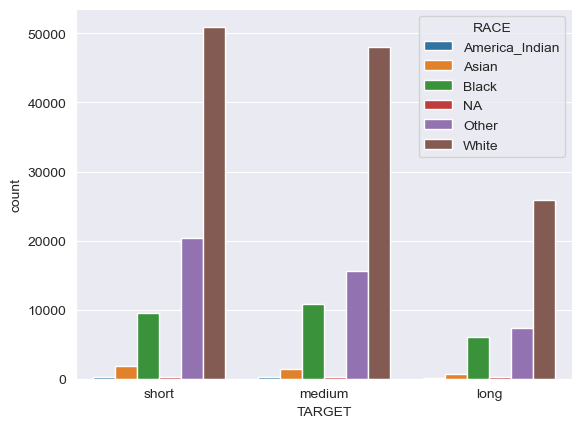

In [58]:
sns.countplot(data=df, x="TARGET", hue="RACE")

The countplot below shows that the biggest ETHNICITY value count for all TARGET values is for Not_Hispanic

<AxesSubplot:xlabel='TARGET', ylabel='count'>

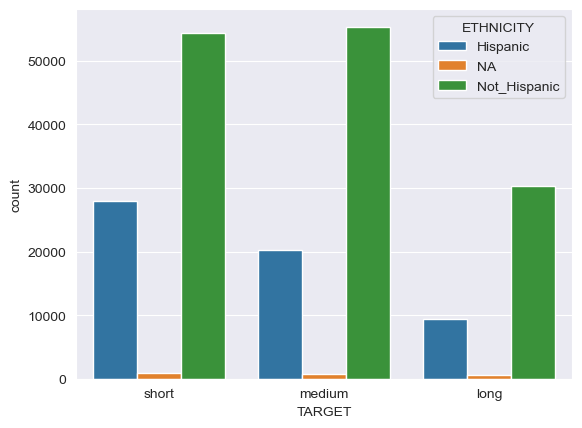

In [59]:
sns.countplot(data=df, x="TARGET", hue="ETHNICITY")

The countplot below shows that the biggest ADMIT_WEEKDAY value count for short and medium TARGET values is for Monday and the biggest for long is Tuesday

<AxesSubplot:xlabel='TARGET', ylabel='count'>

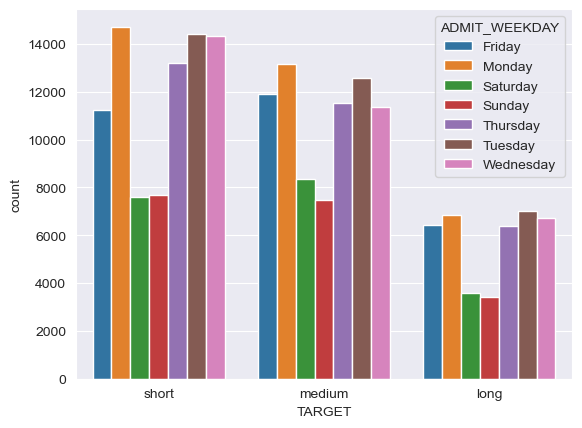

In [60]:
sns.countplot(data=df, x="TARGET", hue="ADMIT_WEEKDAY")

The countplot below shows that the biggest PAT_STATE value count for all TARGET values is for Texas

<AxesSubplot:xlabel='TARGET', ylabel='count'>

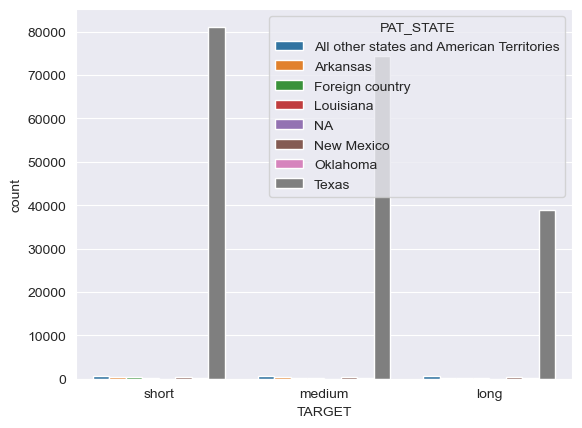

In [61]:
sns.countplot(data=df, x="TARGET", hue="PAT_STATE")

The countplot below shows that the biggest TYPE_OF_ADMISSION value count for all TARGET values is for Emergency

<AxesSubplot:xlabel='TARGET', ylabel='count'>

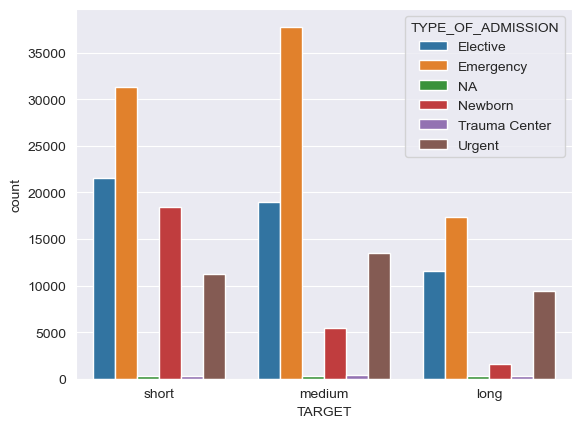

In [62]:
sns.countplot(data=df, x="TARGET", hue="TYPE_OF_ADMISSION")

The countplot below shows that the biggest SOURCE_OF_ADMISSION value count for all TARGET values is for Non-Healthcare POO

<AxesSubplot:xlabel='TARGET', ylabel='count'>

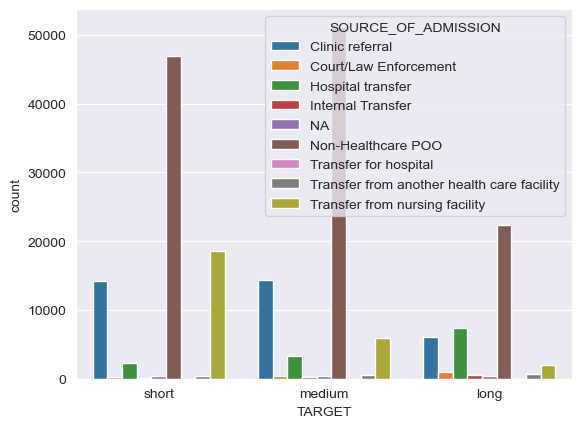

In [63]:
sns.countplot(data=df, x="TARGET", hue="SOURCE_OF_ADMISSION")

The countplot below shows that the biggest RISK_MORTALITY value count for all TARGET values is for Minor_Mortality_Risk

<AxesSubplot:xlabel='TARGET', ylabel='count'>

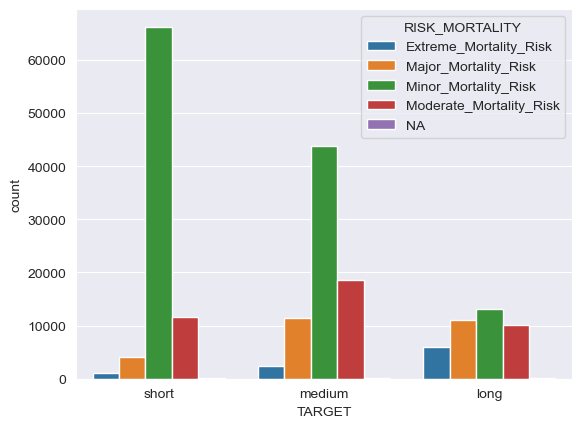

In [64]:
sns.countplot(data=df, x="TARGET", hue="RISK_MORTALITY")

The countplot below shows that the biggest ILLNESS_SEVERITY value count for short TARGET values is for Minor_Illness_Severity, for medium it is Moderate_Illness_Severity and for long it is Major_Illness_Severity

<AxesSubplot:xlabel='TARGET', ylabel='count'>

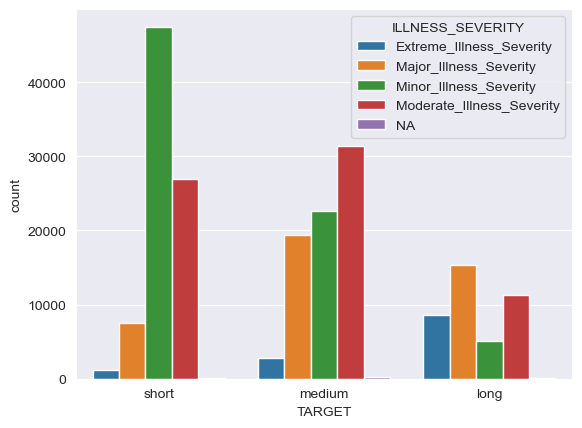

In [65]:
sns.countplot(data=df, x="TARGET", hue="ILLNESS_SEVERITY")

I then saved the cleaned df_train_sample_00_of_5.pkl dataset as a pkl file called train.pkl so I can use it  for model building

In [66]:
df.to_pickle(f"{ROOT}/data/train.pkl")